In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [222]:
df=pd.read_csv('crop_production.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [223]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [224]:
df=df.dropna()

In [225]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [226]:
df.duplicated().sum()

np.int64(0)

In [227]:
df['Crop_Year'].value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

In [228]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [229]:
df['Yield'] = df['Production'] / df['Area']

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_2960\3837750710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = df['Production'] / df['Area']


In [230]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


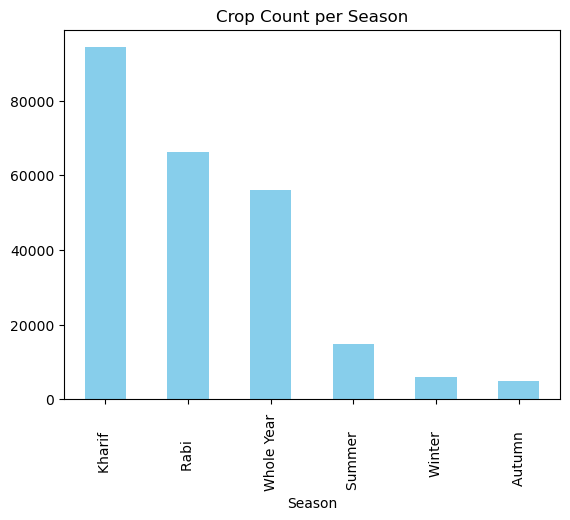

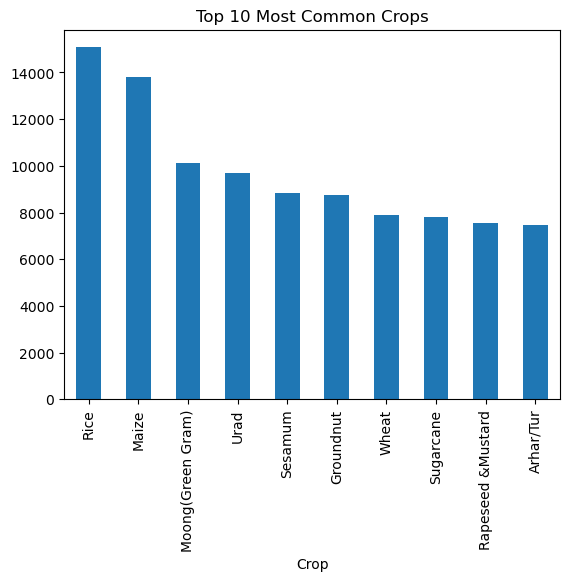

In [231]:
df['Season'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Crop Count per Season")
plt.show()

df['Crop'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Crops")
plt.show()

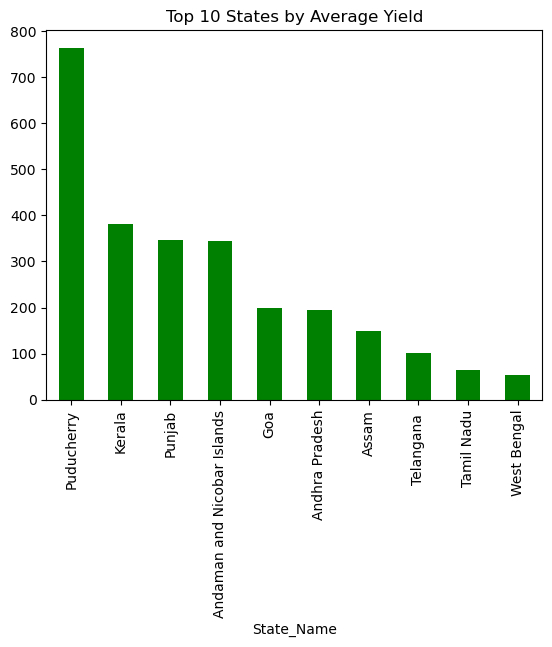

In [232]:
state_yield = df.groupby('State_Name')['Yield'].mean().sort_values(ascending=False).head(10)
state_yield.plot(kind='bar', color='green')
plt.title("Top 10 States by Average Yield")
plt.show()


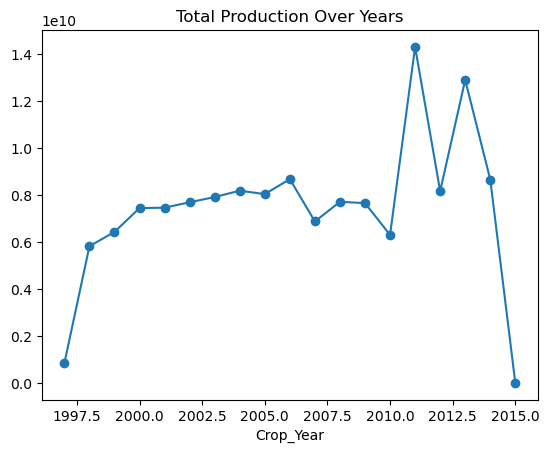

In [233]:
yearly_prod = df.groupby('Crop_Year')['Production'].sum()
yearly_prod.plot(kind='line', marker='o')
plt.title("Total Production Over Years")
plt.show()

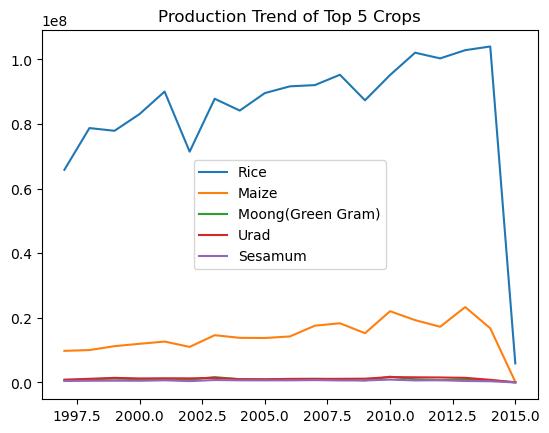

In [234]:
top_crops = df['Crop'].value_counts().head(5).index
for crop in top_crops:
    temp = df[df['Crop'] == crop].groupby('Crop_Year')['Production'].sum()
    plt.plot(temp.index, temp.values, label=crop)
plt.legend()
plt.title("Production Trend of Top 5 Crops")
plt.show()

In [235]:
df.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

Crop
Coconut         1.299816e+11
Sugarcane       5.535682e+09
Rice            1.605470e+09
Wheat           1.332826e+09
Potato          4.248263e+08
Cotton(lint)    2.970000e+08
Maize           2.733418e+08
Jute            1.815582e+08
Banana          1.461327e+08
Soyabean        1.418372e+08
Name: Production, dtype: float64

In [236]:
df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(5)

State_Name
Kerala            9.788005e+10
Andhra Pradesh    1.732459e+10
Tamil Nadu        1.207644e+10
Uttar Pradesh     3.234493e+09
Assam             2.111752e+09
Name: Production, dtype: float64

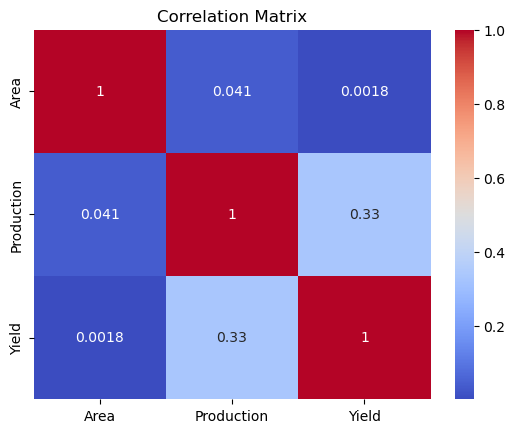

In [237]:
sns.heatmap(df[['Area', 'Production', 'Yield']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [238]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


In [239]:
df.skew(numeric_only=True)

Crop_Year      0.015877
Area          47.769121
Production    40.741540
Yield         51.657462
dtype: float64

In [240]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [241]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [242]:
y = df['Production']
X = df.drop('Production', axis=1)

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
ohe_cols = ['State_Name', 'Season']
ordinal_cols = ['District_Name', 'Crop']
numeric_cols = ['Area', 'Crop_Year']

In [245]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ohe_cols),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols),
        ('numeric', 'passthrough', numeric_cols)
    ],
)

In [246]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1, eval_metric='rmse')
}

In [247]:
results = {}

print("\n--- Starting Model Training & Evaluation ---")

for name, model in models.items():
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f"\nTraining {name}...")
    pipe.fit(X_train, y_train)
    
    print(f"Evaluating {name}...")
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {'R-squared': r2, 'RMSE': rmse}
    print(f"--- {name} Results ---")
    print(f"R-squared: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

print("\n--- Final Model Comparison ---")
for name, metrics in results.items():
    print(f"{name}: R² = {metrics['R-squared']:.4f}, RMSE = {metrics['RMSE']:.4f}")

best_r2_model = max(results, key=lambda k: results[k]['R-squared'])
best_rmse_model = min(results, key=lambda k: results[k]['RMSE'])

print(f"\nBest Model (by R-squared): {best_r2_model}")
print(f"Best Model (by RMSE): {best_rmse_model}")


--- Starting Model Training & Evaluation ---

Training Decision Tree...
Evaluating Decision Tree...
--- Decision Tree Results ---
R-squared: 0.9204
RMSE: 5660183.1699

Training Random Forest...
Evaluating Random Forest...
--- Random Forest Results ---
R-squared: 0.9237
RMSE: 5541852.7374

Training XGBoost...
Evaluating XGBoost...
--- XGBoost Results ---
R-squared: 0.9628
RMSE: 3870879.9248

--- Final Model Comparison ---
Decision Tree: R² = 0.9204, RMSE = 5660183.1699
Random Forest: R² = 0.9237, RMSE = 5541852.7374
XGBoost: R² = 0.9628, RMSE = 3870879.9248

Best Model (by R-squared): XGBoost
Best Model (by RMSE): XGBoost


In [248]:
xgb_tuning_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, eval_metric='rmse'))
])

param_grid = {
    'model__n_estimators': [100, 200, 300, 500, 700],
    'model__max_depth': [3, 5, 7, 10, 15],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_tuning_pipe,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring='r2', 
    n_jobs=-1,
    random_state=42,
    verbose=2
)

print("--- Starting XGBoost Hyperparameter Search ---")
xgb_search.fit(X_train, y_train)

print("\n--- Search Complete ---")
print(f"Best R-squared score found during search: {xgb_search.best_score_:.4f}")
print("\nBest parameters found:")
print(xgb_search.best_params_)

best_xgb_model = xgb_search.best_estimator_

--- Starting XGBoost Hyperparameter Search ---
Fitting 5 folds for each of 25 candidates, totalling 125 fits

--- Search Complete ---
Best R-squared score found during search: 0.9328

Best parameters found:
{'model__subsample': 0.9, 'model__n_estimators': 300, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}


In [249]:
best_tuned_model = xgb_search.best_estimator_

y_pred_tuned = best_tuned_model.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("--- Final Apples-to-Apples Comparison ---")
print(f"Original XGBoost R² (on test set):   0.9628")
print(f"Tuned XGBoost R² (on test set):      {r2_tuned:.4f}")
print("---")
print(f"Original XGBoost RMSE (on test set): 3870879.9248")
print(f"Tuned XGBoost RMSE (on test set):    {rmse_tuned:.4f}")

--- Final Apples-to-Apples Comparison ---
Original XGBoost R² (on test set):   0.9628
Tuned XGBoost R² (on test set):      0.9615
---
Original XGBoost RMSE (on test set): 3870879.9248
Tuned XGBoost RMSE (on test set):    3937671.6094


In [ ]:
# import joblib

# best_tuned_model = xgb_search.best_estimator_ 

# joblib.dump(best_tuned_model, 'crop_prediction_pipeline.joblib')

['crop_prediction_pipeline.joblib']

In [252]:
import mlflow

mlflow.set_experiment("Crop Production Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=f"Baseline_{name}"):
        
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        mlflow.log_params(model.get_params())
        mlflow.log_metric("r2_score", r2)
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(pipe, "model_pipeline")

2025/10/26 20:17:17 INFO mlflow.tracking.fluent: Experiment with name 'Crop Production Prediction' does not exist. Creating a new experiment.
2025/10/26 20:17:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 20:18:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/26 20:24:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 20:24:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/26 20:24:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 20:24:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when lo

In [253]:
import mlflow

mlflow.set_experiment("Crop Production Prediction")

mlflow.autolog()

xgb_search = RandomizedSearchCV(
    estimator=xgb_tuning_pipe,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

print("--- Starting XGBoost Hyperparameter Search ---")
xgb_search.fit(X_train, y_train)

print("--- Search Complete ---")

2025/10/26 20:25:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/26 20:25:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/10/26 20:25:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/10/26 20:25:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '264d6b2835f1440d9d16b9399b9348fc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


--- Starting XGBoost Hyperparameter Search ---


2025/10/26 20:25:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\anaconda\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Fitting 5 folds for each of 25 candidates, totalling 125 fits


2025/10/26 20:28:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\anaconda\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/10/26 20:28:20 INFO mlflow.sklearn.utils: Logging the 5 best runs, 20 runs will be omitted.
2025/10/26 20:28:22 WARNING mlflow.utils.autologging_utils: MLflow autolog

--- Search Complete ---
